In [2]:
from tqdm.notebook import tqdm
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import statistics
import seaborn as sns

from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [64]:
movie_df = pd.read_csv("(완)[KOBIS] 박스오피스_일별(2003~2022)_장르_수정.csv")

# 개봉일과 기준일 날짜형식으로 바꾸기
movie_df['개봉일'] = pd.to_datetime(movie_df['개봉일'])
movie_df['기준일'] = pd.to_datetime(movie_df['기준일'])

# 개봉일, 기준일 기준 - 연도, 월 컬럼 각각 추가
movie_df['기준연도'] = movie_df['기준일'].apply(lambda x : x.year)
movie_df['기준월'] = movie_df['기준일'].apply(lambda x : x.month)
movie_df['개봉연도'] = movie_df['개봉일'].apply(lambda x : x.year)
movie_df['개봉월'] = movie_df['개봉일'].apply(lambda x : x.month)

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482752 entries, 0 to 482751
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   순위      482752 non-null  int64         
 1   영화명     482752 non-null  object        
 2   개봉일     482752 non-null  datetime64[ns]
 3   등급      476018 non-null  object        
 4   장르      482752 non-null  object        
 5   대표국적    482714 non-null  object        
 6   국적      482714 non-null  object        
 7   제작사     213248 non-null  object        
 8   배급사     465038 non-null  object        
 9   감독      469607 non-null  object        
 10  배우      447025 non-null  object        
 11  기준일     482752 non-null  datetime64[ns]
 12  매출액     482752 non-null  int64         
 13  누적매출액   482752 non-null  int64         
 14  관객수     482752 non-null  int64         
 15  누적관객수   482752 non-null  int64         
 16  스크린수    482752 non-null  int64         
 17  상영횟수    482752 non-null  int6

In [65]:
# 역대 장르
top_movie = pd.read_csv("누적관객수_백만명_이상_766개.csv")

# 개봉일과 기준일 날짜형식으로 바꾸기
top_movie['개봉일'] = pd.to_datetime(top_movie['개봉일'])
top_movie['기준일'] = pd.to_datetime(top_movie['기준일'])

# 개봉일, 기준일 기준 - 연도, 월 컬럼 각각 추가
top_movie['기준연도'] = top_movie['기준일'].apply(lambda x : x.year)
top_movie['기준월'] = top_movie['기준일'].apply(lambda x : x.month)
top_movie['개봉연도'] = top_movie['개봉일'].apply(lambda x : x.year)
top_movie['개봉월'] = top_movie['개봉일'].apply(lambda x : x.month)

top_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65794 entries, 0 to 65793
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      65794 non-null  int64         
 1   영화명     65794 non-null  object        
 2   개봉일     65794 non-null  datetime64[ns]
 3   등급      65794 non-null  object        
 4   장르      65794 non-null  object        
 5   대표국적    65794 non-null  object        
 6   국적      65794 non-null  object        
 7   제작사     42244 non-null  object        
 8   배급사     65739 non-null  object        
 9   감독      65794 non-null  object        
 10  배우      65732 non-null  object        
 11  기준일     65794 non-null  datetime64[ns]
 12  매출액     65794 non-null  int64         
 13  누적매출액   65794 non-null  int64         
 14  관객수     65794 non-null  int64         
 15  누적관객수   65794 non-null  int64         
 16  스크린수    65794 non-null  int64         
 17  상영횟수    65794 non-null  int64         
 18  기준연도  

In [66]:
movie_star = pd.read_excel("[크롤링] 관객_백만명이상_네이버_영화_평점_2.xlsx")

# 개봉일과 기준일 날짜형식으로 바꾸기
movie_star['개봉일'] = pd.to_datetime(movie_star['개봉일'])
movie_star['개봉'] = pd.to_datetime(movie_star['개봉'])

movie_star['참여자수'] = movie_star['참여자수'].apply(lambda x : int(x.replace(",","")))

In [67]:
len(movie_star)

776

In [76]:
movie_star[]

,영화명,개봉일,장르,대표국적,누적관객수,누적매출액,제목,러닝타임,개봉,전체,참여자수,남자,여자,_10대,_20대,_30대,_40대,_50대
0,명량,2014-07-30,"사극,액션",한국,17615919,135758658810,명량,128분,2014-07-30,8.88,28765,8.82,8.94,9.18,8.92,8.76,8.84,8.82
1,극한직업,2019-01-23,코미디,한국,16266338,139655543516,극한직업,111분,2019-01-23,9.20,15943,9.16,9.24,9.43,9.32,9.22,9.09,8.82
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",한국,14414658,115727528087,신과함께-죄와 벌,139분,2017-12-20,8.73,26215,8.71,8.75,9.09,8.76,8.66,8.73,8.44
3,국제시장,2014-12-17,드라마,한국,14264478,110947621230,국제시장,126분,2014-12-17,9.16,20295,9.21,9.11,9.41,9.20,9.09,9.11,9.14
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",미국,13977602,122492181020,어벤져스: 엔드게임,181분,2019-04-24,9.50,31975,9.52,9.45,9.81,9.65,9.48,9.16,8.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,개구쟁이 스머프,2011-08-11,애니메이션,미국,1027436,7722519000,개구쟁이 스머프,101분,2011-08-11,8.55,977,7.74,9.09,9.35,7.66,7.34,8.19,7.12
772,연인,2004-09-10,"멜로/로맨스,액션",중국,1027354,6644463500,연인,119분,2004-09-10,6.43,1661,6.50,6.46,6.73,6.22,6.14,6.85,7.23
773,슈퍼 배드,2010-09-16,"애니메이션,가족",미국,1027050,9717463000,슈퍼배드,95분,2010-09-16,8.99,2537,8.83,9.30,9.36,8.72,8.34,9.00,8.65
774,더 넌,2018-09-19,공포(호러),미국,1011580,8777844795,더 넌,96분,2018-09-19,7.37,1633,7.36,7.37,7.55,7.37,7.47,6.90,7.45


In [80]:
movie_star[(movie_star['_40대']==0)|(movie_star['_10대']==0)|(movie_star['_20대']==0)|(movie_star['_30대']==0)|(movie_star['_50대']==0)]

,영화명,개봉일,장르,대표국적,누적관객수,누적매출액,제목,러닝타임,개봉,전체,참여자수,남자,여자,_10대,_20대,_30대,_40대,_50대
60,다크 나이트 라이즈,2012-07-19,"액션,범죄,스릴러",미국,6428574,47910613000,다크 나이트 라이즈,164분,2012-07-19,9.56,16,9.54,9.67,10.00,9.50,9.50,10.00,0.00
124,용의자,2013-12-24,"액션,스릴러",한국,4131338,30037521000,용의자,137분,2013-12-24,8.27,55,8.16,8.43,9.00,8.24,8.00,8.80,0.00
347,"색, 계",2007-11-08,"드라마,멜로/로맨스",미국,1925774,12661780400,"색, 계",158분,2007-11-08,9.70,10,9.25,10.00,0.00,9.83,10.00,9.33,0.00
357,내 머리 속의 지우개,2004-11-05,멜로/로맨스,한국,1887868,11936105600,내 머리 속의 지우개,117분,2004-11-05,9.09,11,9.25,9.00,0.00,9.00,9.00,10.00,0.00
416,라이프 오브 파이,2013-01-01,"어드벤처,드라마",미국,1646997,16384876100,라이프 오브 파이,127분,2013-01-01,9.53,85,9.27,9.67,0.00,9.64,9.38,8.20,10.00
429,밀양,2007-05-23,드라마,한국,1605819,10283739300,밀양,141분,2007-05-23,8.90,31,8.95,8.82,0.00,9.08,8.91,8.17,10.00
435,오페라의 유령,2004-12-08,"뮤지컬,드라마",미국,1578678,10098420100,오페라의 유령,143분,2004-12-08,8.85,13,9.20,8.62,9.33,8.67,9.00,0.00,0.00
535,킹덤 오브 헤븐,2005-05-04,액션,미국,1237269,7815893000,킹덤 오브 헤븐,144분,2005-05-04,9.24,82,9.18,9.35,0.00,9.23,9.18,9.12,9.55
672,트로이,2004-05-21,사극,미국,2001318,12777421000,트로이,196분,2004-05-21,9.33,21,9.30,9.36,9.00,9.20,9.38,10.00,0.00
708,아바타,2009-12-17,"SF,액션,어드벤처",미국,13338863,125304346000,아바타,162분,2009-12-17,9.42,19,9.69,8.83,0.00,9.12,9.43,10.00,10.00


In [68]:
# 연령대 평점 0인 최대 참여자수 비교
for i in range(1,6):
    print(f'{i}0대 : ',movie_star[movie_star[f"_{i}0대"]==0]["참여자수"].max())

10대 :  85
20대 :  nan
30대 :  nan
40대 :  13
50대 :  55


In [6]:
# 754개 데이터로 분석
movie_star_df = movie_star[movie_star['참여자수']>85].copy()
len(movie_star_df)

754

In [7]:
# 색상 맵 선택
cmap = cm.get_cmap('tab20c')
colors = cmap(np.array(range(1,50)))

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6076\1826526935.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


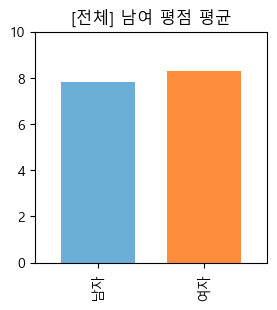

In [8]:
total_describe = movie_star_df.describe().round(1)
total_describe.loc['mean'][['남자','여자']].plot(kind='bar', color=colors[::4], width=0.7, figsize=(3,3))
plt.ylim(0,10)
plt.title("[전체] 남여 평점 평균")
plt.show()

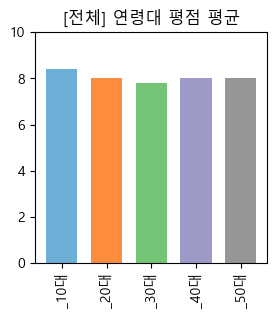

In [9]:
total_describe = movie_star_df.describe().round(1)
total_describe.loc['mean'][['_10대', '_20대', '_30대','_40대', '_50대']].plot(kind='bar', color=colors[::4], width=0.7, figsize=(3,3))
plt.ylim(0,10)
plt.title("[전체] 연령대 평점 평균")
plt.show()

In [10]:
genre = "액션"
df = movie_star_df[movie_star_df["장르"].str.contains(genre)].describe().transpose().round(1).reset_index().copy()
df["장르"] = genre
df

,index,count,mean,std,min,25%,50%,75%,max,장르
0,누적관객수,320.0,3.344091e+06,2.579539e+06,1.002858e+06,1.557765e+06,2.551726e+06,4.323501e+06,1.761592e+07,액션
1,누적매출액,320.0,2.661328e+10,2.182340e+10,6.267176e+09,1.169127e+10,1.948762e+10,3.325756e+10,1.357587e+11,액션
2,전체,320.0,8.000000e+00,9.000000e-01,3.300000e+00,7.500000e+00,8.100000e+00,8.700000e+00,9.600000e+00,액션
3,참여자수,320.0,6.629300e+03,7.075300e+03,1.280000e+02,2.550800e+03,4.689000e+03,7.436200e+03,5.131500e+04,액션
4,남자,320.0,7.800000e+00,1.000000e+00,2.800000e+00,7.100000e+00,8.000000e+00,8.700000e+00,9.600000e+00,액션
5,여자,320.0,8.300000e+00,8.000000e-01,4.600000e+00,7.900000e+00,8.500000e+00,8.800000e+00,9.600000e+00,액션
6,_10대,320.0,8.400000e+00,9.000000e-01,3.900000e+00,8.000000e+00,8.700000e+00,9.100000e+00,9.800000e+00,액션
7,_20대,320.0,7.900000e+00,1.100000e+00,2.800000e+00,7.300000e+00,8.100000e+00,8.800000e+00,9.600000e+00,액션
8,_30대,320.0,7.700000e+00,1.100000e+00,3.000000e+00,6.900000e+00,7.900000e+00,8.600000e+00,9.600000e+00,액션
9,_40대,320.0,8.000000e+00,8.000000e-01,3.700000e+00,7.600000e+00,8.100000e+00,8.600000e+00,9.600000e+00,액션


In [11]:
col_list = df.columns
col_list

Index(['index', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       '장르'],
      dtype='object')

In [12]:
genres = []
for li in movie_df['장르'].unique():
    if ',' in li:
        pass
    else:
        genres.append(li)
len(genres)

19

In [13]:
df1 = pd.DataFrame(columns=col_list)
# 장르별 평점 비교
for genre in genres:
    df = movie_star_df[movie_star_df["장르"].str.contains(genre)].describe().transpose().round(1).reset_index().copy()
    df["장르"] = genre
    df1 = pd.concat([df1,df],axis=0)

df2 = df1[['장르', 'index', 'count', 'mean', 'min', '50%', 'max']].copy()
df2.columns = ['장르', '구분', '영화수', '평균', '최소', '중앙', '최대']
genre_star = df2[(df2["구분"]!='누적관객수')&(df2["구분"]!='누적매출액')&(df2["구분"]!='참여자수')].copy()

genre_star

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6076\1740378040.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = movie_star_df[movie_star_df["장르"].str.contains(genre)].describe().transpose().round(1).reset_index().copy()
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6076\1740378040.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = movie_star_df[movie_star_df["장르"].str.contains(genre)].describe().transpose().round(1).reset_index().copy()


,장르,구분,영화수,평균,최소,중앙,최대
2,코미디,전체,171.0,8.0,4.0,8.1,9.4
4,코미디,남자,171.0,7.7,3.4,7.9,9.4
5,코미디,여자,171.0,8.2,5.1,8.5,9.6
6,코미디,_10대,171.0,8.4,5.0,8.8,9.8
7,코미디,_20대,171.0,7.8,3.4,8.1,9.4
...,...,...,...,...,...,...,...
6,가족,_10대,39.0,8.7,5.5,9.0,9.7
7,가족,_20대,39.0,8.1,3.6,8.6,9.5
8,가족,_30대,39.0,8.0,4.2,8.3,9.5
9,가족,_40대,39.0,8.3,4.7,8.6,9.3


In [14]:
genre_star[genre_star['구분']=="전체"][["장르","평균"]].set_index("장르")['평균'].sort_values(ascending=False)

장르
다큐멘터리       9.1
뮤지컬         8.8
애니메이션       8.7
가족          8.4
기타          8.3
범죄          8.2
SF          8.2
어드벤처        8.1
드라마         8.1
판타지         8.0
전쟁          8.0
액션          8.0
미스터리        8.0
코미디         8.0
스릴러         7.9
멜로/로맨스      7.8
사극          7.7
공포(호러)      NaN
서부극(웨스턴)    NaN
Name: 평균, dtype: float64

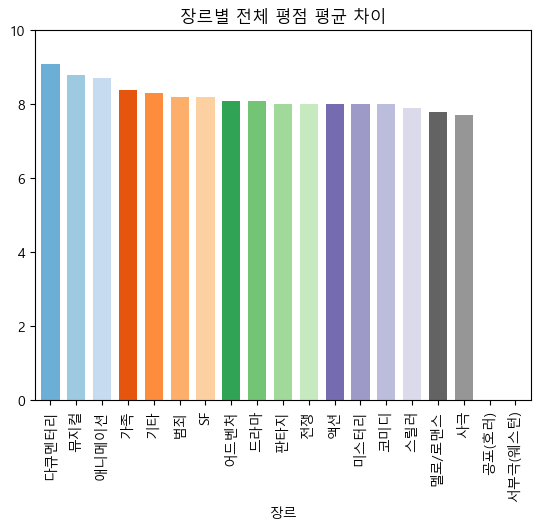

In [17]:
genre_star[genre_star['구분']=="전체"][["장르","평균"]].set_index("장르")['평균'].sort_values(ascending=False).plot(kind='bar', width=0.7, color = colors)

plt.ylim(0,10)
plt.title("장르별 전체 평점 평균 차이")
plt.show()

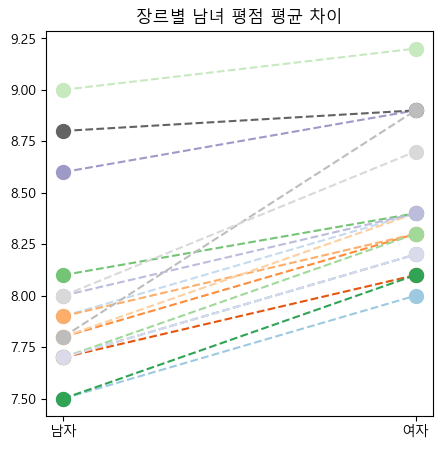

In [38]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
cnt=0

for genre in genres:
    genre_df = genre_star[genre_star['장르']==genre]
    genre_df.iloc[1:3]['평균']
    ax.plot(['남자','여자'],genre_df.iloc[1:3]['평균'].values, ls='--', marker='o', markersize=10, color=colors[cnt], label=f"{genre}")
    cnt+=1

# ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.title("장르별 남녀 평점 평균 차이")
plt.show()

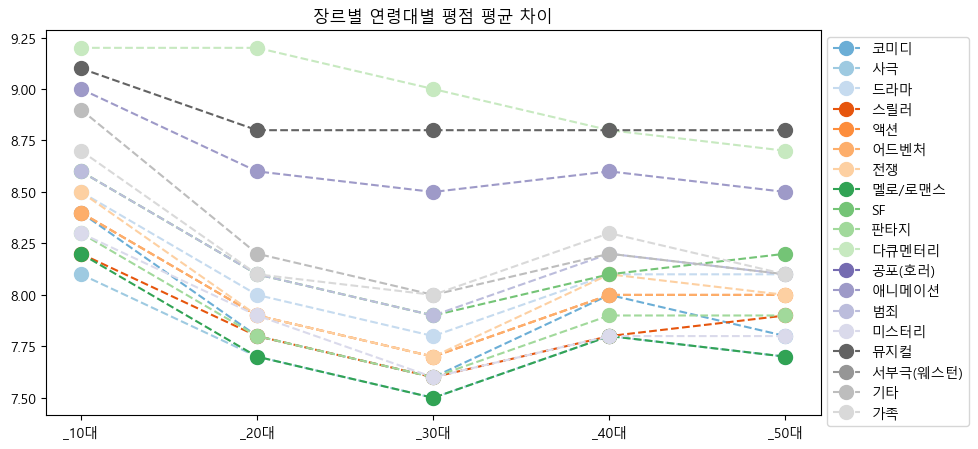

In [37]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
cnt=0

for genre in genres:
    genre_df = genre_star[genre_star['장르']==genre]
    genre_df.iloc[1:3]['평균']
    ax.plot(['_10대','_20대','_30대','_40대','_50대'],genre_df.iloc[3:]['평균'].values, ls='--', marker='o', markersize=10, color=colors[cnt],label=f"{genre}")
    cnt += 1 
    
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("장르별 연령대별 평점 평균 차이")
plt.show()

In [400]:
# 장르별 백만명이상 영화 분석
genre = "액션"
genre_star = movie_star_df[movie_star_df['장르'].str.contains(genre)]
genre_star

,영화명,개봉일,장르,대표국적,누적관객수,누적매출액,제목,러닝타임,개봉,전체,참여자수,남자,여자,_10대,_20대,_30대,_40대,_50대
0,명량,2014-07-30,"사극,액션",한국,17615919,135758658810,명량,128분,2014-07-30,8.88,28765,8.82,8.94,9.18,8.92,8.76,8.84,8.82
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",미국,13977602,122492181020,어벤져스: 엔드게임,181분,2019-04-24,9.50,31975,9.52,9.45,9.81,9.65,9.48,9.16,8.89
6,베테랑,2015-08-05,"액션,드라마",한국,13414484,105170856250,베테랑,123분,2015-08-05,9.24,22762,9.24,9.25,9.50,9.33,9.19,9.06,9.08
7,도둑들,2012-07-25,"액션,범죄",한국,12984701,93672497700,도둑들,135분,2012-07-25,7.65,20993,6.92,8.35,8.24,7.62,7.03,7.64,7.15
9,암살,2015-07-22,"액션,드라마",한국,12706947,98469385781,암살,139분,2015-07-22,9.10,21635,9.02,9.17,9.41,9.15,9.01,9.03,9.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,성난황소,2018-11-22,"범죄,액션",한국,1593386,13236490737,성난황소,115분,2018-11-22,8.66,2651,8.68,8.63,9.52,8.85,8.48,8.26,8.68
759,말레피센트,2014-05-29,"액션,어드벤처,드라마",미국,1397526,10776965900,말레피센트,97분,2014-05-29,8.39,1803,8.30,8.44,8.58,8.39,8.33,8.36,8.46
762,가디언즈 오브 갤럭시,2014-07-31,"액션,어드벤처,SF",미국,1344599,11393194684,가디언즈 오브 갤럭시,122분,2014-07-31,8.64,2579,8.73,8.49,8.89,8.71,8.52,8.52,8.00
764,빅매치,2014-11-27,액션,한국,1177438,8952096578,빅매치,112분,2014-11-26,7.82,807,7.74,7.91,8.66,7.79,7.63,7.83,8.47


In [401]:
genre_star['전체'].apply(lambda x : int(x)).to_frame().groupby(["전체"])["전체"].count()

전체
3      1
4      2
5      3
6     34
7    102
8    144
9     34
Name: 전체, dtype: int64

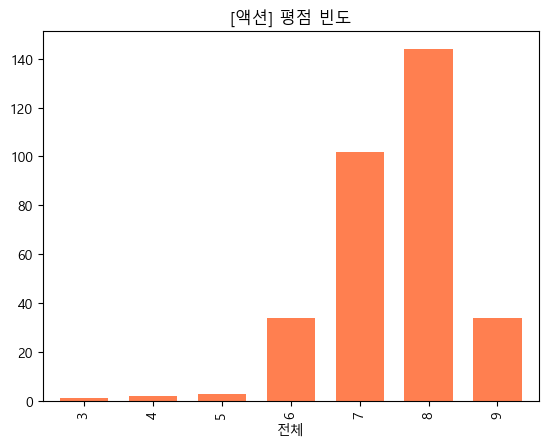

In [402]:
genre_star['전체'].apply(lambda x : int(x)).to_frame().groupby(["전체"])["전체"].count().plot(kind="bar", width=0.7, color = 'coral')
plt.title(f"[{genre}] 평점 빈도")
plt.show()

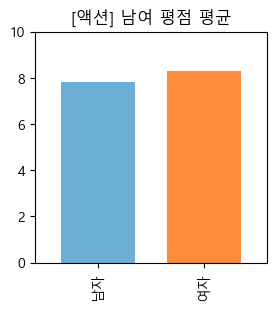

In [403]:
genre_describe = genre_star.describe().round(1)
genre_describe.loc['mean'][['남자','여자']].plot(kind='bar', color=colors[::4], width=0.7, figsize=(3,3))
plt.ylim(0,10)
plt.title(f"[{genre}] 남여 평점 평균")
plt.show()

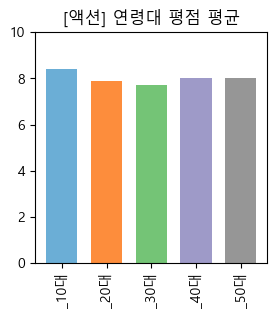

In [404]:
genre_describe = genre_star.describe().round(1)
genre_describe.loc['mean'][['_10대', '_20대', '_30대','_40대', '_50대']].plot(kind='bar', color=colors[::4], width=0.7, figsize=(3,3))
plt.ylim(0,10)
plt.title(f"[{genre}] 연령대 평점 평균")
plt.show()

In [405]:
genre_describe

,누적관객수,누적매출액,전체,참여자수,남자,여자,_10대,_20대,_30대,_40대,_50대
count,320.0,3.200000e+02,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0
mean,3344091.3,2.661328e+10,8.0,6629.3,7.8,8.3,8.4,7.9,7.7,8.0,8.0
std,2579539.0,2.182340e+10,0.9,7075.3,1.0,0.8,0.9,1.1,1.1,0.8,0.9
min,1002858.0,6.267176e+09,3.3,128.0,2.8,4.6,3.9,2.8,3.0,3.7,3.5
25%,1557765.2,1.169127e+10,7.5,2550.8,7.1,7.9,8.0,7.3,6.9,7.6,7.6
50%,2551726.5,1.948762e+10,8.1,4689.0,8.0,8.5,8.7,8.1,7.9,8.1,8.2
75%,4323500.8,3.325756e+10,8.7,7436.2,8.7,8.8,9.1,8.8,8.6,8.6,8.6
max,17615919.0,1.357587e+11,9.6,51315.0,9.6,9.6,9.8,9.6,9.6,9.6,9.8


# 워드클라우드

In [14]:
# 한글 형태소 분석기
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # 그림을 불러오는 패키지
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
# nltk.download('punkt')
from nltk.corpus import stopwords
from konlpy.tag import Okt, Kkma, Komoran # 세가지 방법이 있음

from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl

# 마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 한글 경로
font_path = r"C:\Windows\Fonts\malgun.ttf"# 워드클라우드 분석

In [15]:
# 인스턴스 생성
okt = Okt()
kkma = Kkma()
komoran = Komoran()

# 관람객+평론가 리뷰 워드클라우드

In [16]:
reviews = pd.read_excel("[크롤링] 관객_백만명이상_네이버_영화_리뷰_2.xlsx")
reviews.head()

,영화명,개봉일,제목,개봉,구분,별점,리뷰
0,명량,2014-07-30,명량,2014-07-30,관람객,10.0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,명량,2014-07-30,명량,2014-07-30,관람객,9.0,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,명량,2014-07-30,명량,2014-07-30,관람객,10.0,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,명량,2014-07-30,명량,2014-07-30,관람객,10.0,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,명량,2014-07-30,명량,2014-07-30,관람객,8.0,전쟁씬에서 입벌리고봄


In [17]:
tokens = []
for i in range(len(reviews["리뷰"])):
    try:
        text = reviews["리뷰"].iloc[i]
        tokens.extend(okt.nouns(text))
    except:
        print(reviews.iloc[i])
len(tokens)

영화명         과속스캔들
개봉일    2008-12-03
제목          과속스캔들
개봉     2008-12-03
구분            관람객
별점           10.0
리뷰            NaN
Name: 2190, dtype: object
영화명    다크 나이트 라이즈
개봉일    2012-07-19
제목     다크 나이트 라이즈
개봉     2012-07-19
구분            관람객
별점            8.0
리뷰            NaN
Name: 4154, dtype: object
영화명         투사부일체
개봉일    2006-01-19
제목          투사부일체
개봉     2006-01-19
구분            관람객
별점           10.0
리뷰            NaN
Name: 6074, dtype: object
영화명    조선명탐정 : 각시투구꽃의 비밀
개봉일           2011-01-27
제목      조선명탐정: 각시투구꽃의 비밀
개봉            2011-01-27
구분                   관람객
별점                   9.0
리뷰                   NaN
Name: 6860, dtype: object
영화명    조선명탐정 : 각시투구꽃의 비밀
개봉일           2011-01-27
제목      조선명탐정: 각시투구꽃의 비밀
개봉            2011-01-27
구분                   관람객
별점                   9.0
리뷰                   NaN
Name: 6861, dtype: object
영화명    조선명탐정 : 각시투구꽃의 비밀
개봉일           2011-01-27
제목      조선명탐정: 각시투구꽃의 비밀
개봉            2011-01-27
구분                   관람객
별점               

영화명           글러브
개봉일    2011-01-20
제목            글러브
개봉     2011-01-20
구분            관람객
별점            8.0
리뷰            NaN
Name: 23931, dtype: object
영화명           코리아
개봉일    2012-05-03
제목            코리아
개봉     2012-05-03
구분            관람객
별점           10.0
리뷰            NaN
Name: 24049, dtype: object
영화명           코리아
개봉일    2012-05-03
제목            코리아
개봉     2012-05-03
구분            관람객
별점           10.0
리뷰            NaN
Name: 24062, dtype: object
영화명        아이들...
개봉일    2011-02-17
제목         아이들...
개봉     2011-02-17
구분            관람객
별점           10.0
리뷰            NaN
Name: 24118, dtype: object
영화명     해리포터와 아즈카반의 죄수
개봉일         2004-07-16
제목     해리 포터와 아즈카반의 죄수
개봉          2004-07-16
구분                 관람객
별점                10.0
리뷰                 NaN
Name: 24162, dtype: object
영화명        작업의 정석
개봉일    2005-12-21
제목         작업의 정석
개봉     2005-12-21
구분            관람객
별점           10.0
리뷰            NaN
Name: 24610, dtype: object
영화명        작업의 정석
개봉일    2005-12-21
제목         

영화명    쥬만지: 넥스트 레벨
개봉일     2019-12-11
제목     쥬만지: 넥스트 레벨
개봉      2019-12-11
구분             관람객
별점             8.0
리뷰             NaN
Name: 40432, dtype: object
영화명    쥬만지: 넥스트 레벨
개봉일     2019-12-11
제목     쥬만지: 넥스트 레벨
개봉      2019-12-11
구분             관람객
별점             8.0
리뷰             NaN
Name: 40433, dtype: object
영화명    쥬만지: 넥스트 레벨
개봉일     2019-12-11
제목     쥬만지: 넥스트 레벨
개봉      2019-12-11
구분             관람객
별점             6.0
리뷰             NaN
Name: 40453, dtype: object
영화명          라따뚜이
개봉일    2007-07-25
제목           라따뚜이
개봉     2007-07-25
구분            관람객
별점           10.0
리뷰            NaN
Name: 41111, dtype: object
영화명           역도산
개봉일    2004-12-15
제목            역도산
개봉     2004-12-15
구분            관람객
별점           10.0
리뷰            NaN
Name: 41401, dtype: object
영화명       파괴된 사나이
개봉일    2010-07-01
제목        파괴된 사나이
개봉     2010-07-01
구분            관람객
별점           10.0
리뷰            NaN
Name: 41598, dtype: object
영화명       파송송 계란탁
개봉일    2005-02-18
제목        파송송 계란탁
개봉     

400354

In [18]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]','',token) for token in tokens]
len(tokens)

400354

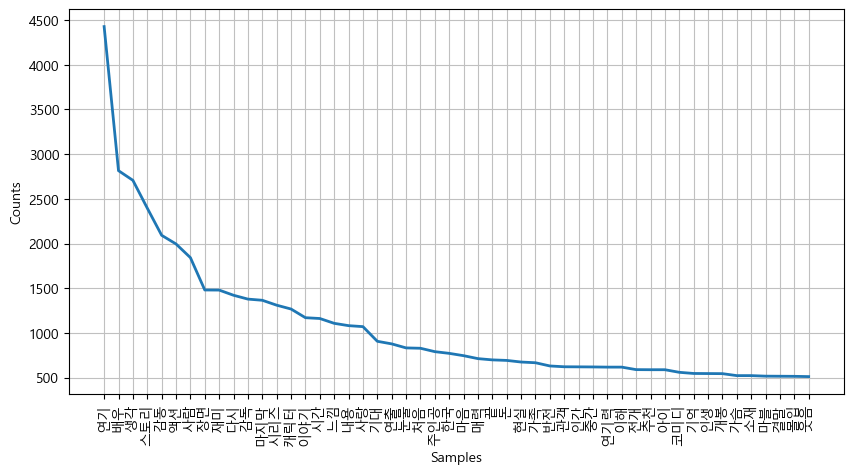

In [19]:
# 불용어 작성
stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 최고 점 때 말 보고 의 왜 편 정도 역시 볼 하나 좀 내 듯 또 나
지금 안 가장 작품 그냥 거 꼭 건 대한 모든 번 우리 모두 부분 속 감
게 한번 중 못 임 다른 이상 위 은
때문 전 대박 만 뭐 두 도 조금 눈 자체 함 걸 완전 명작 계속 난 개 제일 애 놈 저 줄 요 위해 재 별로 이건 굿 올해 천만 내내 알 이제
편이 제 약 보지 이영화, 평점
'''

# 불용어를 리스트로 만들고 불용어 리스트에 없는 단어만 tokens에 다시 넣기
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

# 불용어 제외한 단어 빈도수 시각화
rv = nltk.Text(tokens, name = '영화리뷰')
plt.figure(figsize=(10,5))
rv.plot(50)
plt.show()

In [20]:
# 빈도수 많은 순으로 단어 300개만 골라서 넣어라
data = rv.vocab().most_common(300)
font_path = r"C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(data))

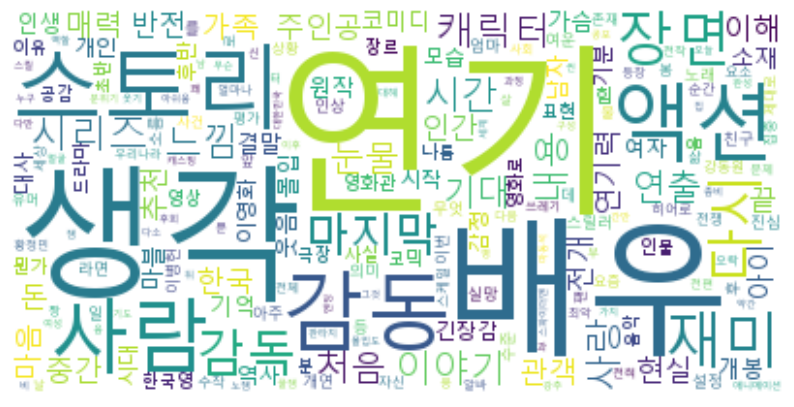

In [21]:
# 워드 클라우드 시각화
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# 관람객 리뷰 워드클라우드

In [22]:
netizen = reviews[reviews["구분"]=='관람객']
netizen.head()

,영화명,개봉일,제목,개봉,구분,별점,리뷰
0,명량,2014-07-30,명량,2014-07-30,관람객,10.0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,명량,2014-07-30,명량,2014-07-30,관람객,9.0,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,명량,2014-07-30,명량,2014-07-30,관람객,10.0,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,명량,2014-07-30,명량,2014-07-30,관람객,10.0,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,명량,2014-07-30,명량,2014-07-30,관람객,8.0,전쟁씬에서 입벌리고봄


In [23]:
tokens = []
for i in range(len(netizen["리뷰"])):
    try:
        text = netizen["리뷰"].iloc[i]
        tokens.extend(okt.nouns(text))
    except:
        print(netizen.iloc[i])
len(tokens)

영화명         과속스캔들
개봉일    2008-12-03
제목          과속스캔들
개봉     2008-12-03
구분            관람객
별점           10.0
리뷰            NaN
Name: 2190, dtype: object
영화명    다크 나이트 라이즈
개봉일    2012-07-19
제목     다크 나이트 라이즈
개봉     2012-07-19
구분            관람객
별점            8.0
리뷰            NaN
Name: 4154, dtype: object
영화명         투사부일체
개봉일    2006-01-19
제목          투사부일체
개봉     2006-01-19
구분            관람객
별점           10.0
리뷰            NaN
Name: 6074, dtype: object
영화명    조선명탐정 : 각시투구꽃의 비밀
개봉일           2011-01-27
제목      조선명탐정: 각시투구꽃의 비밀
개봉            2011-01-27
구분                   관람객
별점                   9.0
리뷰                   NaN
Name: 6860, dtype: object
영화명    조선명탐정 : 각시투구꽃의 비밀
개봉일           2011-01-27
제목      조선명탐정: 각시투구꽃의 비밀
개봉            2011-01-27
구분                   관람객
별점                   9.0
리뷰                   NaN
Name: 6861, dtype: object
영화명    조선명탐정 : 각시투구꽃의 비밀
개봉일           2011-01-27
제목      조선명탐정: 각시투구꽃의 비밀
개봉            2011-01-27
구분                   관람객
별점               

영화명           글러브
개봉일    2011-01-20
제목            글러브
개봉     2011-01-20
구분            관람객
별점           10.0
리뷰            NaN
Name: 23912, dtype: object
영화명           글러브
개봉일    2011-01-20
제목            글러브
개봉     2011-01-20
구분            관람객
별점           10.0
리뷰            NaN
Name: 23929, dtype: object
영화명           글러브
개봉일    2011-01-20
제목            글러브
개봉     2011-01-20
구분            관람객
별점            8.0
리뷰            NaN
Name: 23931, dtype: object
영화명           코리아
개봉일    2012-05-03
제목            코리아
개봉     2012-05-03
구분            관람객
별점           10.0
리뷰            NaN
Name: 24049, dtype: object
영화명           코리아
개봉일    2012-05-03
제목            코리아
개봉     2012-05-03
구분            관람객
별점           10.0
리뷰            NaN
Name: 24062, dtype: object
영화명        아이들...
개봉일    2011-02-17
제목         아이들...
개봉     2011-02-17
구분            관람객
별점           10.0
리뷰            NaN
Name: 24118, dtype: object
영화명     해리포터와 아즈카반의 죄수
개봉일         2004-07-16
제목     해리 포터와 아즈카반의 죄수
개봉          2

영화명    그 여자 작사 그 남자 작곡
개봉일         2007-02-28
제목     그 여자 작사 그 남자 작곡
개봉          2007-02-28
구분                 관람객
별점                10.0
리뷰                 NaN
Name: 39892, dtype: object
영화명    쥬만지: 넥스트 레벨
개봉일     2019-12-11
제목     쥬만지: 넥스트 레벨
개봉      2019-12-11
구분             관람객
별점             8.0
리뷰             NaN
Name: 40432, dtype: object
영화명    쥬만지: 넥스트 레벨
개봉일     2019-12-11
제목     쥬만지: 넥스트 레벨
개봉      2019-12-11
구분             관람객
별점             8.0
리뷰             NaN
Name: 40433, dtype: object
영화명    쥬만지: 넥스트 레벨
개봉일     2019-12-11
제목     쥬만지: 넥스트 레벨
개봉      2019-12-11
구분             관람객
별점             6.0
리뷰             NaN
Name: 40453, dtype: object
영화명          라따뚜이
개봉일    2007-07-25
제목           라따뚜이
개봉     2007-07-25
구분            관람객
별점           10.0
리뷰            NaN
Name: 41111, dtype: object
영화명           역도산
개봉일    2004-12-15
제목            역도산
개봉     2004-12-15
구분            관람객
별점           10.0
리뷰            NaN
Name: 41401, dtype: object
영화명       파괴된 사나이
개봉일    2

309666

In [24]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]','',token) for token in tokens]
len(tokens)

309666

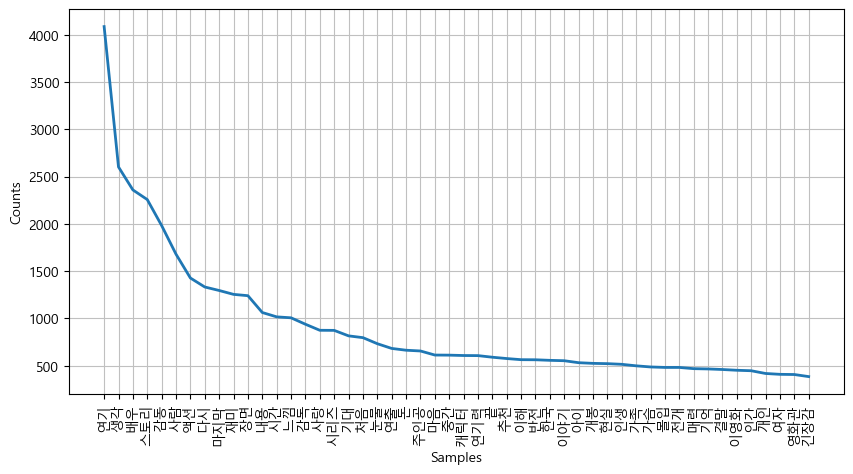

In [25]:
# 불용어 작성
stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 최고 점 때 말 보고 의 왜 편 정도 역시 볼 하나 좀 내 듯 또 나
지금 안 가장 작품 그냥 거 꼭 건 대한 모든 번 우리 모두 부분 속 감
게 한번 중 못 임 다른 이상 위 은
때문 전 대박 만 뭐 두 도 조금 눈 자체 함 걸 완전 명작 계속 난 개 제일 애 놈 저 줄 요 위해 재 별로 이건 굿 올해 천만 내내 알 이제
편이 제 약 보지 이영화 평점
'''

# 불용어를 리스트로 만들고 불용어 리스트에 없는 단어만 tokens에 다시 넣기
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

# 불용어 제외한 단어 빈도수 시각화
rv = nltk.Text(tokens, name = '영화리뷰')
plt.figure(figsize=(10,5))
rv.plot(50)
plt.show()

In [26]:
# 빈도수 많은 순으로 단어 300개만 골라서 넣어라
data = rv.vocab().most_common(300)
font_path = r"C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(data))

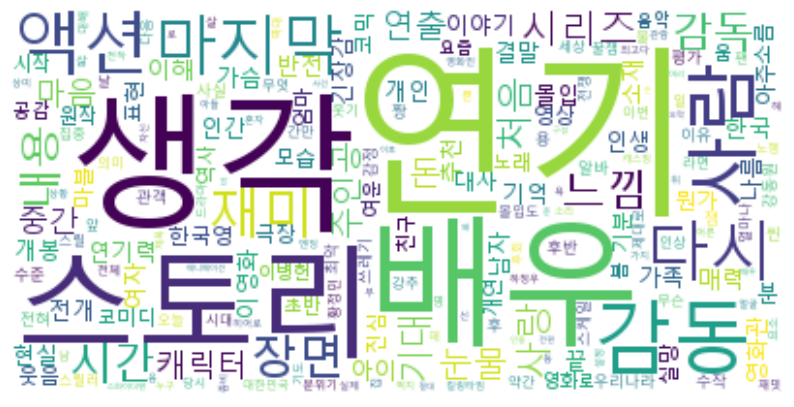

In [27]:
# 워드 클라우드 시각화
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 관람객 평점 높은 리뷰 (9~10)

In [28]:
netizen

,영화명,개봉일,제목,개봉,구분,별점,리뷰
0,명량,2014-07-30,명량,2014-07-30,관람객,10.0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,명량,2014-07-30,명량,2014-07-30,관람객,9.0,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,명량,2014-07-30,명량,2014-07-30,관람객,10.0,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,명량,2014-07-30,명량,2014-07-30,관람객,10.0,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,명량,2014-07-30,명량,2014-07-30,관람객,8.0,전쟁씬에서 입벌리고봄
...,...,...,...,...,...,...,...
46909,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,관람객,10.0,소가 일만해서 불쌍하다구? 시골에 살아도 소 꼴베서 30년 메긴다는게 얼마나 힘든 ...
46910,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,관람객,10.0,각박한 세상 속 메마른 정신을 일깨우는 다큐
46911,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,관람객,10.0,3번째봤어요..이영화이후소고기끊었어요 3년째
46912,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,관람객,10.0,하늘에서 편히 쉬시기 바랍니다.


In [29]:
tokens = []
count = 0

for i in range(len(netizen["리뷰"])):
    try:
        if int(netizen['별점'].iloc[i]) > 8:
            text = netizen["리뷰"].iloc[i]
            tokens.extend(okt.nouns(text))
            count += 1 
        else:
            pass
    except:
        print(netizen.iloc[i])
len(tokens)

영화명         과속스캔들
개봉일    2008-12-03
제목          과속스캔들
개봉     2008-12-03
구분            관람객
별점           10.0
리뷰            NaN
Name: 2190, dtype: object
영화명         투사부일체
개봉일    2006-01-19
제목          투사부일체
개봉     2006-01-19
구분            관람객
별점           10.0
리뷰            NaN
Name: 6074, dtype: object
영화명    조선명탐정 : 각시투구꽃의 비밀
개봉일           2011-01-27
제목      조선명탐정: 각시투구꽃의 비밀
개봉            2011-01-27
구분                   관람객
별점                   9.0
리뷰                   NaN
Name: 6860, dtype: object
영화명    조선명탐정 : 각시투구꽃의 비밀
개봉일           2011-01-27
제목      조선명탐정: 각시투구꽃의 비밀
개봉            2011-01-27
구분                   관람객
별점                   9.0
리뷰                   NaN
Name: 6861, dtype: object
영화명        7급 공무원
개봉일    2009-04-22
제목         7급 공무원
개봉     2009-04-22
구분            관람객
별점            9.0
리뷰            NaN
Name: 8665, dtype: object
영화명    우리 생애 최고의 순간
개봉일      2008-01-10
제목     우리 생애 최고의 순간
개봉       2008-01-10
구분              관람객
별점             10.0
리뷰              NaN
Na

영화명          마파도2
개봉일    2007-01-18
제목          마파도 2
개봉     2007-01-18
구분            관람객
별점           10.0
리뷰            NaN
Name: 32049, dtype: object
영화명        오션스 써틴
개봉일    2007-06-14
제목         오션스 13
개봉     2007-06-14
구분            관람객
별점           10.0
리뷰            NaN
Name: 32632, dtype: object
영화명        오션스 써틴
개봉일    2007-06-14
제목         오션스 13
개봉     2007-06-14
구분            관람객
별점           10.0
리뷰            NaN
Name: 32648, dtype: object
영화명            가족
개봉일    2004-09-03
제목             가족
개봉     2004-09-03
구분            관람객
별점           10.0
리뷰            NaN
Name: 34724, dtype: object
영화명           각설탕
개봉일    2006-08-10
제목            각설탕
개봉     2006-08-10
구분            관람객
별점           10.0
리뷰            NaN
Name: 34788, dtype: object
영화명           각설탕
개봉일    2006-08-10
제목            각설탕
개봉     2006-08-10
구분            관람객
별점           10.0
리뷰            NaN
Name: 34789, dtype: object
영화명        킹콩을 들다
개봉일    2009-07-01
제목         킹콩을 들다
개봉     2009-07-01
구분        

195845

In [30]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]','',token) for token in tokens]
len(tokens)

195845

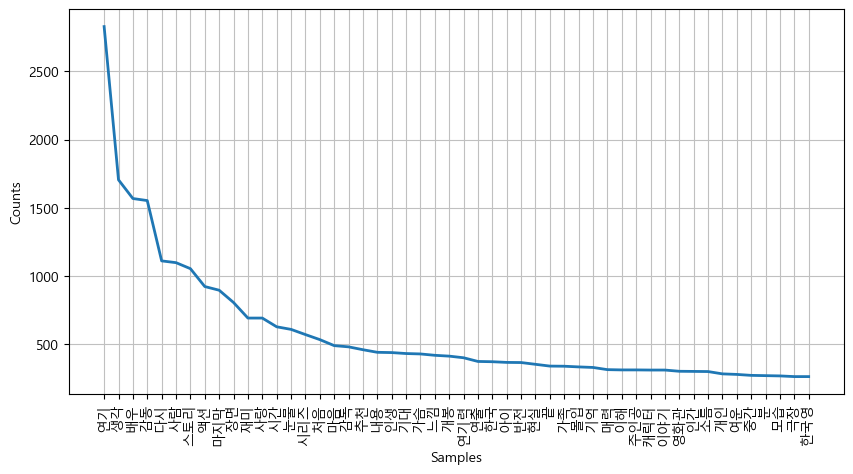

In [32]:
# 불용어 작성
stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 최고 점 때 말 보고 의 왜 편 정도 역시 볼 하나 좀 내 듯 또 나
지금 안 가장 작품 그냥 거 꼭 건 대한 모든 번 우리 모두 부분 속 감
게 한번 중 못 임 다른 이상 위 은
때문 전 대박 만 뭐 두 도 조금 눈 자체 함 걸 완전 명작 계속 난 개 제일 애 놈 저 줄 요 위해 재 별로 이건 굿 올해 천만 내내 알 이제
편이 제 약 보지 이영화 평점
'''

# 불용어를 리스트로 만들고 불용어 리스트에 없는 단어만 tokens에 다시 넣기
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

# 불용어 제외한 단어 빈도수 시각화
rv = nltk.Text(tokens, name = '영화리뷰')
plt.figure(figsize=(10,5))
rv.plot(50)
plt.show()

In [33]:
# 빈도수 많은 순으로 단어 300개만 골라서 넣어라
data = rv.vocab().most_common(300)
font_path = r"C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(data))

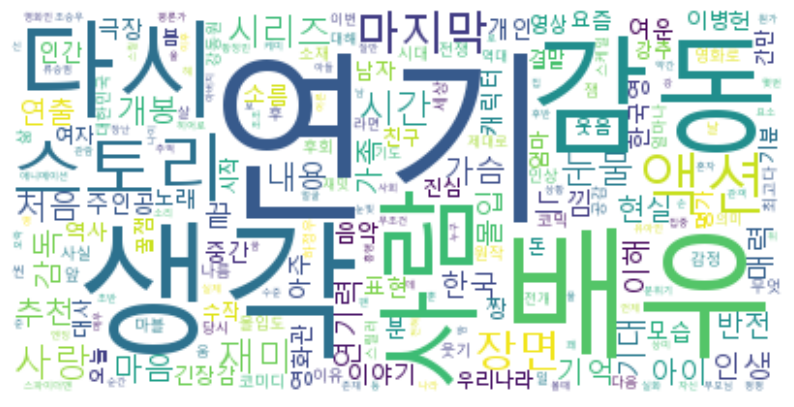

In [34]:
# 워드 클라우드 시각화
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 관람객 평점 낮은 리뷰 (1~2)

In [35]:
netizen

,영화명,개봉일,제목,개봉,구분,별점,리뷰
0,명량,2014-07-30,명량,2014-07-30,관람객,10.0,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,명량,2014-07-30,명량,2014-07-30,관람객,9.0,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,명량,2014-07-30,명량,2014-07-30,관람객,10.0,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,명량,2014-07-30,명량,2014-07-30,관람객,10.0,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,명량,2014-07-30,명량,2014-07-30,관람객,8.0,전쟁씬에서 입벌리고봄
...,...,...,...,...,...,...,...
46909,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,관람객,10.0,소가 일만해서 불쌍하다구? 시골에 살아도 소 꼴베서 30년 메긴다는게 얼마나 힘든 ...
46910,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,관람객,10.0,각박한 세상 속 메마른 정신을 일깨우는 다큐
46911,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,관람객,10.0,3번째봤어요..이영화이후소고기끊었어요 3년째
46912,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,관람객,10.0,하늘에서 편히 쉬시기 바랍니다.


In [36]:
tokens = []
count = 0

for i in range(len(netizen["리뷰"])):
    try:
        if int(netizen['별점'].iloc[i]) < 3:
            text = netizen["리뷰"].iloc[i]
            tokens.extend(okt.nouns(text))
            count += 1 
        else:
            pass
    except:
        print(netizen.iloc[i])
len(tokens)

영화명            반도
개봉일    2020-07-15
제목             반도
개봉     2020-07-15
구분            관람객
별점            2.0
리뷰            NaN
Name: 9564, dtype: object
영화명      82년생 김지영
개봉일    2019-10-23
제목       82년생 김지영
개봉     2019-10-23
구분            관람객
별점            2.0
리뷰            NaN
Name: 10144, dtype: object
영화명     가문의 영광4 - 가문의 수난
개봉일           2011-09-07
제목     가문의 영광 4 - 가문의 수난
개봉            2011-09-07
구분                   관람객
별점                   1.0
리뷰                   NaN
Name: 18180, dtype: object
영화명         #살아있다
개봉일    2020-06-24
제목          #살아있다
개봉     2020-06-24
구분            관람객
별점            1.0
리뷰            NaN
Name: 23517, dtype: object
영화명         베스트셀러
개봉일    2010-04-15
제목          베스트셀러
개봉     2010-04-15
구분            관람객
별점            2.0
리뷰            NaN
Name: 39626, dtype: object


35490

In [37]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]','',token) for token in tokens]
len(tokens)

35490

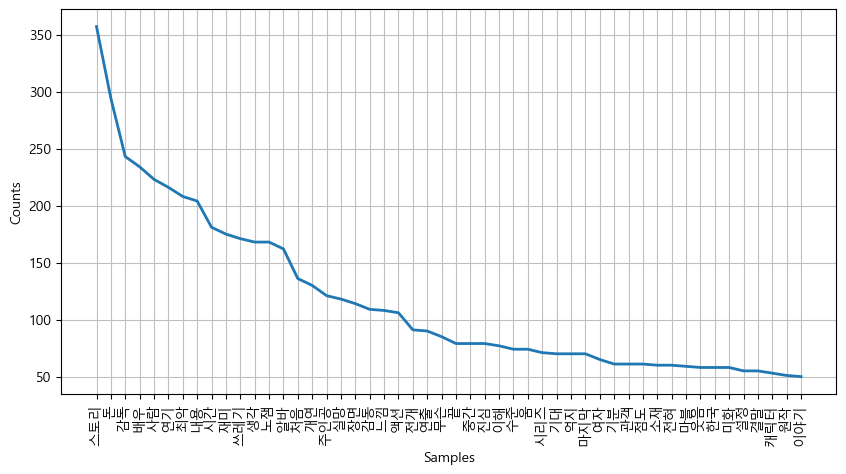

In [38]:
# 불용어 작성
stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 최고 점 때 말 보고 의 왜 편 정도 역시 볼 하나 좀 내 듯 또 나
지금 안 가장 작품 그냥 거 꼭 건 대한 모든 번 우리 모두 부분 속 감
게 한번 중 못 임 다른 이상 위 은
때문 전 대박 만 뭐 두 도 조금 눈 자체 함 걸 완전 명작 계속 난 개 제일 애 놈 저 줄 요 위해 재 별로 이건 굿 올해 천만 내내 알 이제
편이 제 약 보지 이영화 평점
'''

# 불용어를 리스트로 만들고 불용어 리스트에 없는 단어만 tokens에 다시 넣기
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

# 불용어 제외한 단어 빈도수 시각화
rv = nltk.Text(tokens, name = '영화리뷰')
plt.figure(figsize=(10,5))
rv.plot(50)
plt.show()

In [40]:
# 빈도수 많은 순으로 단어 300개만 골라서 넣어라
data = rv.vocab().most_common(300)
font_path = r"C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(data))

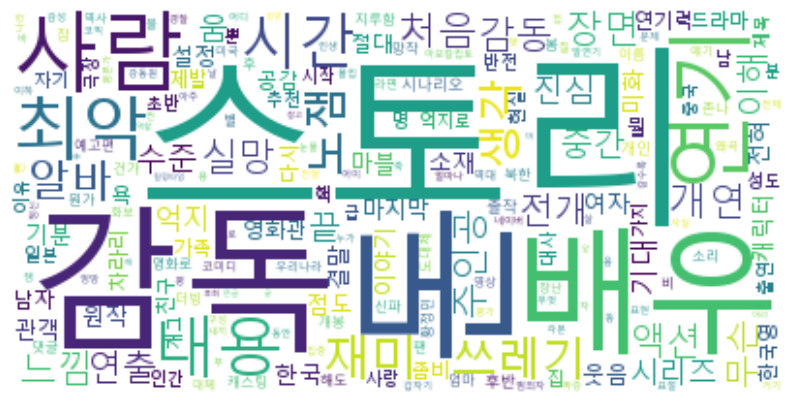

In [41]:
# 워드 클라우드 시각화
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# 평론가 리뷰 워드클라우드

In [428]:
critic = reviews[reviews["구분"]=='평론가']
critic.head()

,영화명,개봉일,제목,개봉,구분,별점,리뷰
60,명량,2014-07-30,명량,2014-07-30,평론가,7.00,캐릭터에 대한 깊이 있는 고찰이나 당대에 대한 역사의식이나 고증의 완벽함에 대한 기...
61,명량,2014-07-30,명량,2014-07-30,평론가,6.75,수식 없는 묵직한 정공법으로 끝까지 밀어붙인다. 비장하고 진지하고 숙연하다. 해전 ...
62,명량,2014-07-30,명량,2014-07-30,평론가,6.00,해전신은 꽤 볼만하다
63,명량,2014-07-30,명량,2014-07-30,평론가,5.00,인물은 흐릿하고 해전만 요란하다
64,명량,2014-07-30,명량,2014-07-30,평론가,6.00,"해상 전투는 순류, 나머지는 역류. 반반 무(武) 많이"


In [429]:
tokens = []
for i in range(len(critic["리뷰"])):
    try:
        text = critic["리뷰"].iloc[i]
        tokens.extend(okt.nouns(text))
    except:
        print(critic.iloc[i])
len(tokens)

90688

In [430]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]','',token) for token in tokens]
len(tokens)

90688

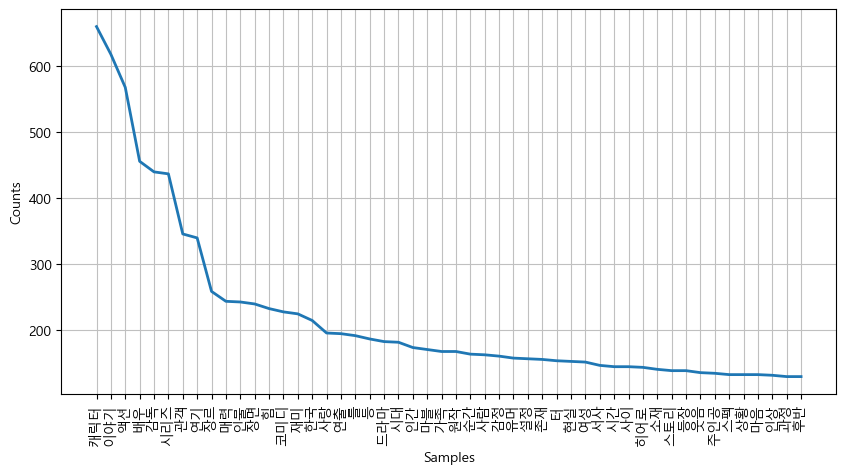

In [431]:
# 불용어 작성
stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 최고 점 때 말 보고 의 왜 편 정도 역시 볼 하나 좀 내 듯 또 나
지금 안 가장 작품 그냥 거 꼭 건 대한 모든 번 우리 모두 부분 속 감
게 한번 중 못 임 다른 이상 위 은
때문 전 대박 만 뭐 두 도 조금 눈 자체 함 걸 완전 명작 계속 난 개 제일 애 놈 저 줄 요 위해 재 별로 이건 굿 올해 천만 내내 알 이제
편이 제 약 보지 이영화, 평점
'''

# 불용어를 리스트로 만들고 불용어 리스트에 없는 단어만 tokens에 다시 넣기
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

# 불용어 제외한 단어 빈도수 시각화
rv = nltk.Text(tokens, name = '영화리뷰')
plt.figure(figsize=(10,5))
rv.plot(50)
plt.show()

In [432]:
# 빈도수 많은 순으로 단어 300개만 골라서 넣어라
data = rv.vocab().most_common(300)
font_path = r"C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(data))

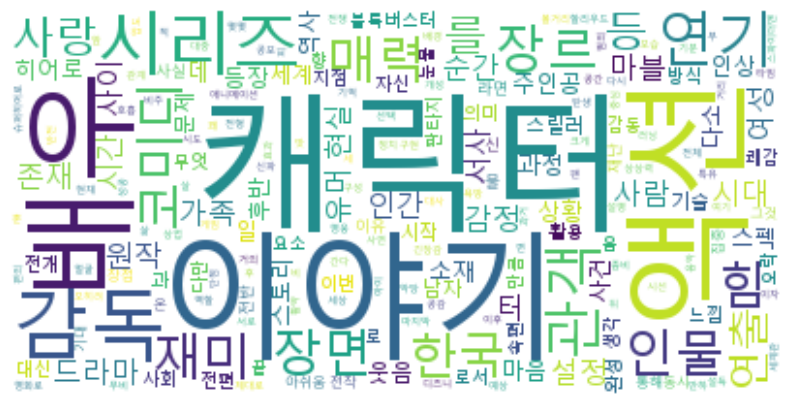

In [433]:
# 워드 클라우드 시각화
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 평론가 평점 높은 리뷰 (6~10)

In [434]:
critic

,영화명,개봉일,제목,개봉,구분,별점,리뷰
60,명량,2014-07-30,명량,2014-07-30,평론가,7.00,캐릭터에 대한 깊이 있는 고찰이나 당대에 대한 역사의식이나 고증의 완벽함에 대한 기...
61,명량,2014-07-30,명량,2014-07-30,평론가,6.75,수식 없는 묵직한 정공법으로 끝까지 밀어붙인다. 비장하고 진지하고 숙연하다. 해전 ...
62,명량,2014-07-30,명량,2014-07-30,평론가,6.00,해전신은 꽤 볼만하다
63,명량,2014-07-30,명량,2014-07-30,평론가,5.00,인물은 흐릿하고 해전만 요란하다
64,명량,2014-07-30,명량,2014-07-30,평론가,6.00,"해상 전투는 순류, 나머지는 역류. 반반 무(武) 많이"
...,...,...,...,...,...,...,...
46918,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,평론가,7.00,"나이듦과 죽음, 이별 같은 인생의 잔인한 것들에 대한 관조이자 소를 닮은 아버지들에..."
46919,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,평론가,4.00,죽음을 앞둔 이들의 무뚝뚝한 유머가 최고의 장점
46920,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,평론가,7.00,끈끈하고 담담하고 무엇보다 정직한 카메라
46921,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,평론가,7.00,죽기 전에는 살아야 한다


In [440]:
tokens = []
count = 0

for i in range(len(critic["리뷰"])):
    try:
        if int(critic['별점'].iloc[i]) >= 6:
            text = critic["리뷰"].iloc[i]
            tokens.extend(okt.nouns(text))
            count += 1 
        else:
            pass
    except:
        print(critic.iloc[i])
len(tokens)

74192

In [441]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]','',token) for token in tokens]
len(tokens)

74192

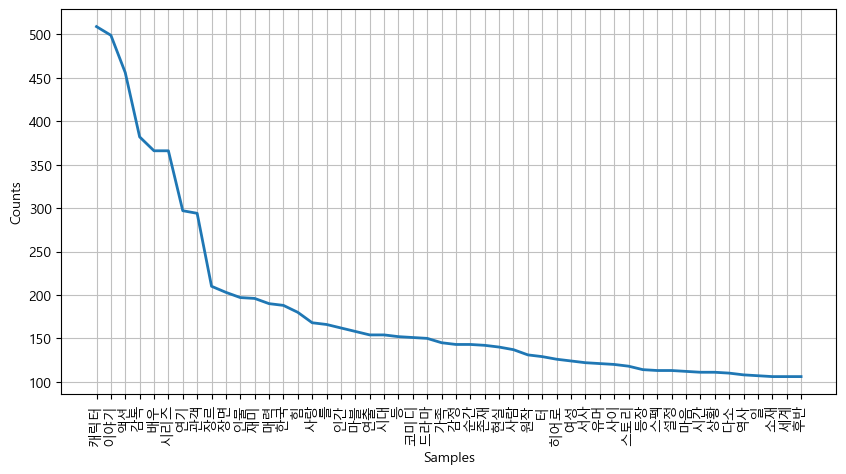

In [442]:
# 불용어 작성
stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 최고 점 때 말 보고 의 왜 편 정도 역시 볼 하나 좀 내 듯 또 나
지금 안 가장 작품 그냥 거 꼭 건 대한 모든 번 우리 모두 부분 속 감
게 한번 중 못 임 다른 이상 위 은
때문 전 대박 만 뭐 두 도 조금 눈 자체 함 걸 완전 명작 계속 난 개 제일 애 놈 저 줄 요 위해 재 별로 이건 굿 올해 천만 내내 알 이제
편이 제 약 보지 이영화
'''

# 불용어를 리스트로 만들고 불용어 리스트에 없는 단어만 tokens에 다시 넣기
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

# 불용어 제외한 단어 빈도수 시각화
rv = nltk.Text(tokens, name = '영화리뷰')
plt.figure(figsize=(10,5))
rv.plot(50)
plt.show()

In [443]:
# 빈도수 많은 순으로 단어 300개만 골라서 넣어라
data = rv.vocab().most_common(300)
font_path = r"C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(data))

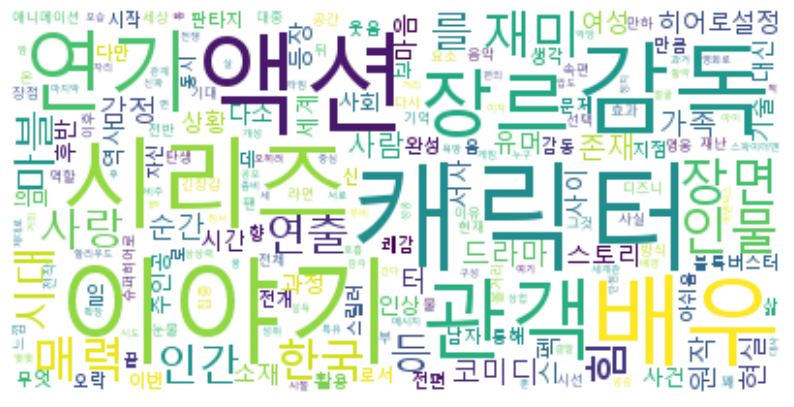

In [444]:
# 워드 클라우드 시각화
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 평론가 평점 낮은 리뷰 (1~5)

In [434]:
critic

,영화명,개봉일,제목,개봉,구분,별점,리뷰
60,명량,2014-07-30,명량,2014-07-30,평론가,7.00,캐릭터에 대한 깊이 있는 고찰이나 당대에 대한 역사의식이나 고증의 완벽함에 대한 기...
61,명량,2014-07-30,명량,2014-07-30,평론가,6.75,수식 없는 묵직한 정공법으로 끝까지 밀어붙인다. 비장하고 진지하고 숙연하다. 해전 ...
62,명량,2014-07-30,명량,2014-07-30,평론가,6.00,해전신은 꽤 볼만하다
63,명량,2014-07-30,명량,2014-07-30,평론가,5.00,인물은 흐릿하고 해전만 요란하다
64,명량,2014-07-30,명량,2014-07-30,평론가,6.00,"해상 전투는 순류, 나머지는 역류. 반반 무(武) 많이"
...,...,...,...,...,...,...,...
46918,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,평론가,7.00,"나이듦과 죽음, 이별 같은 인생의 잔인한 것들에 대한 관조이자 소를 닮은 아버지들에..."
46919,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,평론가,4.00,죽음을 앞둔 이들의 무뚝뚝한 유머가 최고의 장점
46920,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,평론가,7.00,끈끈하고 담담하고 무엇보다 정직한 카메라
46921,워낭소리,2009-01-15,워낭소리,2009-01-15 00:00:00,평론가,7.00,죽기 전에는 살아야 한다


In [435]:
tokens = []
count = 0

for i in range(len(critic["리뷰"])):
    try:
        if int(critic['별점'].iloc[i]) <= 5:
            text = critic["리뷰"].iloc[i]
            tokens.extend(okt.nouns(text))
            count += 1 
        else:
            pass
    except:
        print(critic.iloc[i])
len(tokens)

16496

In [436]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]','',token) for token in tokens]
len(tokens)

16496

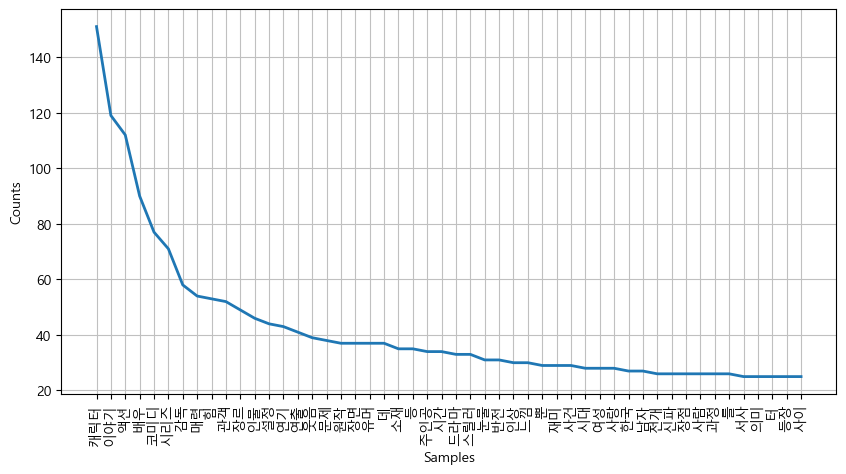

In [437]:
# 불용어 작성
stoptext = '''
영화 이 보기 것 진짜 그 더 정말 수 최고 점 때 말 보고 의 왜 편 정도 역시 볼 하나 좀 내 듯 또 나
지금 안 가장 작품 그냥 거 꼭 건 대한 모든 번 우리 모두 부분 속 감
게 한번 중 못 임 다른 이상 위 은
때문 전 대박 만 뭐 두 도 조금 눈 자체 함 걸 완전 명작 계속 난 개 제일 애 놈 저 줄 요 위해 재 별로 이건 굿 올해 천만 내내 알 이제
편이 제 약 보지 이영화
'''

# 불용어를 리스트로 만들고 불용어 리스트에 없는 단어만 tokens에 다시 넣기
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

# 불용어 제외한 단어 빈도수 시각화
rv = nltk.Text(tokens, name = '영화리뷰')
plt.figure(figsize=(10,5))
rv.plot(50)
plt.show()

In [438]:
# 빈도수 많은 순으로 단어 300개만 골라서 넣어라
data = rv.vocab().most_common(300)
font_path = r"C:\Windows\Fonts\malgun.ttf"
wc = WordCloud(background_color='white', font_path=font_path).generate_from_frequencies(dict(data))

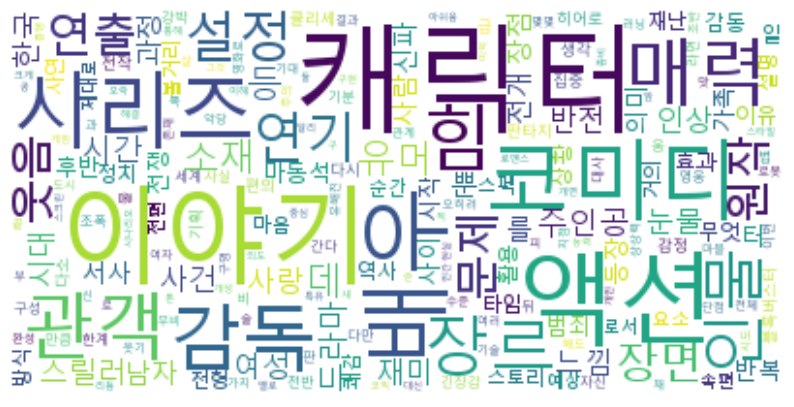

In [439]:
# 워드 클라우드 시각화
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()